# Homework 5: 2D Arrays and Agent-based Modeling (EXTRA CREDIT)

### <p style="text-align: right;"> &#9989; Lowell Monis
    

  
## Learning Goals

In this homework, you will:

* Access and manipulate 2D arrays
* Implement, explore and assess an agent-based model of forest fires

## Practice goals

* Understanding code on a conceptual level
* Commenting code
* Running numerical experiments to collect statistics
* Connecting models to real-world systems

## Grading

* Part 1: Image segmentation (27 points)  
* Part 2: Only you!... can prevent forest fires (43 points)  

**Total:** 70 pts

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59 pm on Friday, April 19.** It should be uploaded into the "Homework Assignments" submission folder for Homework #5.  Submission instructions can be found at the end of the notebook.

---
<a id="toc"></a>

## Table of Contents

[Part 1. Image Segmentation](#part_1)  (27 points)

[Part 2. Controlled Forest Fires](#part_2)  (43 points)

---
<a id="part_1"></a>

## Part 1: Image segmentation (27 points)

[Back to Top](#toc)

Image segmentation is a critical process in computer vision that involves dividing an image into multiple segments or parts to make the image more meaningful and easier to analyze. At its core, image segmentation aims to assign a label to every pixel in an image such that pixels with the same label share certain characteristics. This technique enables the identification of boundaries and objects within images, paving the way for more advanced image analysis and understanding.

In real-world applications, image segmentation plays a pivotal role in numerous fields, including medical imaging, autonomous driving, and object detection. By accurately segmenting an image into its constituent parts, we can isolate and analyze specific regions of interest, enhancing both the efficiency and accuracy of image processing tasks.


**Goals**

In this part of the homework, you will delve into the practical application of image segmentation using 2D and 3D arrays. By leveraging your knowledge of array manipulation, you will create a visually appealing representation of an image, demonstrating the power of image segmentation techniques. The goal is to not only reinforce your understanding of 2D and 3D arrays but also to showcase how these fundamental concepts are applied in the field of computer vision.


- Learning Outcome: By the end of this part, you should be able to apply basic image segmentation techniques to manipulate and analyze images. This will be a stepping stone towards understanding more complex image processing tasks.

- Task: Utilizing the provided image of Sparty, you will apply segmentation techniques to isolate specific features or segments of the image, creating a unique visual effect that highlights your understanding of the concept.



**GO GREEN!!** Run the cell below to see a picture of Sparty. As it turns out, you can use what you've learned about 2D arrays to create a cool picture. Let's do it!

(-0.5, 732.5, 1101.5, -0.5)

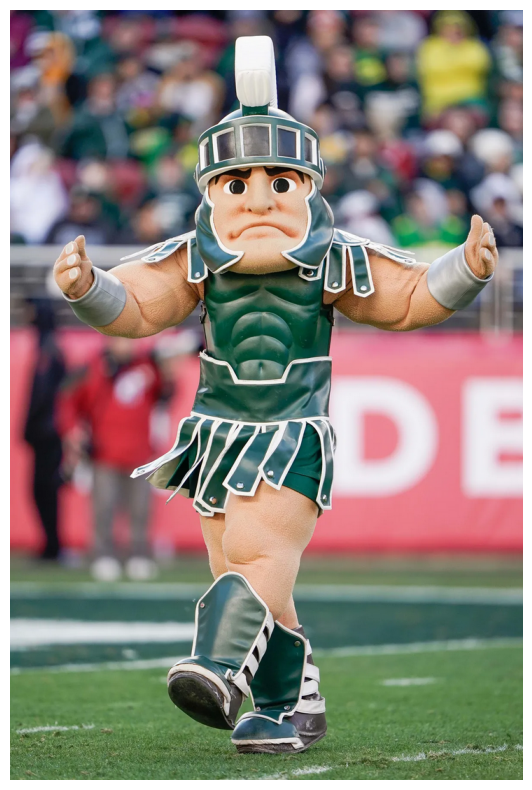

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

picture = Image.open("sparty.png")
sparty = picture.convert('RGB')
plt.figure(figsize = (10,10))
plt.imshow(picture)
plt.axis('off')

### Question 1.1 (2 points)
As we saw in the in-class assignment, this picture can be represented by an array. Without using code, write down how many dimensions this array has and what they each represent.

<font size=6 color="#009600">&#9998;</font> *There are three dimensions in this array: height, width, and color channels (RGB levels from 0 to 255).*

We want our logo to only include Sparty, not the background. Using the website [Segment Anything](https://segment-anything.com/demo), we create a *mask*, which shows white where Sparty is and black everywhere else. The process of separating out different parts of an image is called *image segmentation*, and is an active area of research in computer science. We won't go into details in this assignment, so you can just run the cell below to import a mask in the shape of Sparty.

(-0.5, 732.5, 1101.5, -0.5)

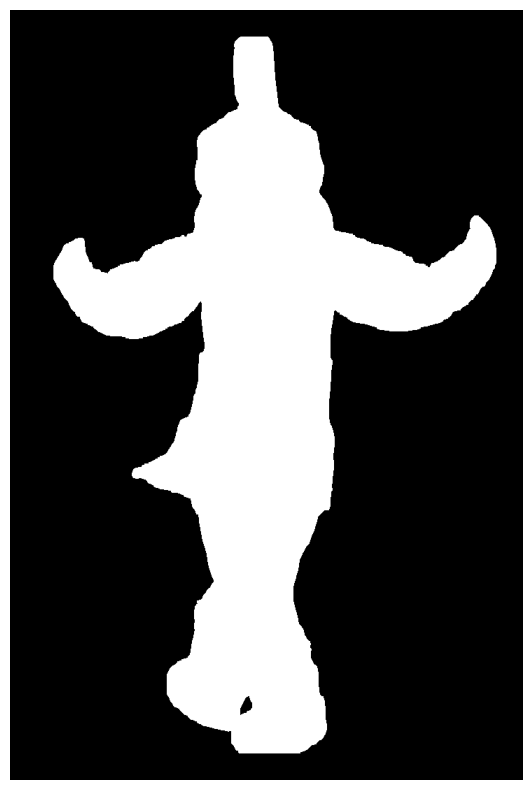

In [3]:
mask = Image.open("sparty_mask.png")
plt.figure(figsize = (10,10))
plt.imshow(mask, cmap='binary_r')
plt.axis('off')

### Question 1.2 (4 points)
Think back to Day 06, when we discussed ethics in data science. Write down a potential ethical problem that might arise when using software such as Segment Anything. If you're stuck, read more about Segment Anything at the link above.

<font size=6 color="#009600">&#9998;</font> *There are two primary concerns that come to mind:*

*1. Is our data safe? Even though the website says that the data is deleted after the use of the model, what if there is a breach?*

*2. How was the model trained? Could it be biased? A primary concern with training models is who it is trained on. Will the model be able to recognize racial minorities while segmenting the image?*

### Question 1.3 (2 points)
After running the code above, we get a black-and-white outline of Sparty. What is the minimum number of dimensions we need to represent this image as an array?

<font size=6 color="#009600">&#9998;</font> *It will need a minimum of two dimensions. Since the image is not in color, there is no need for the third dimension for RGB channels. The height and width dimensions will suffice.*

We are going to add the mask as an *alpha layer* to the orignal image of Sparty. This is a fourth layer that sits on top of the three RGB layers that determines the transparency of each pixel.

(-0.5, 732.5, 1101.5, -0.5)

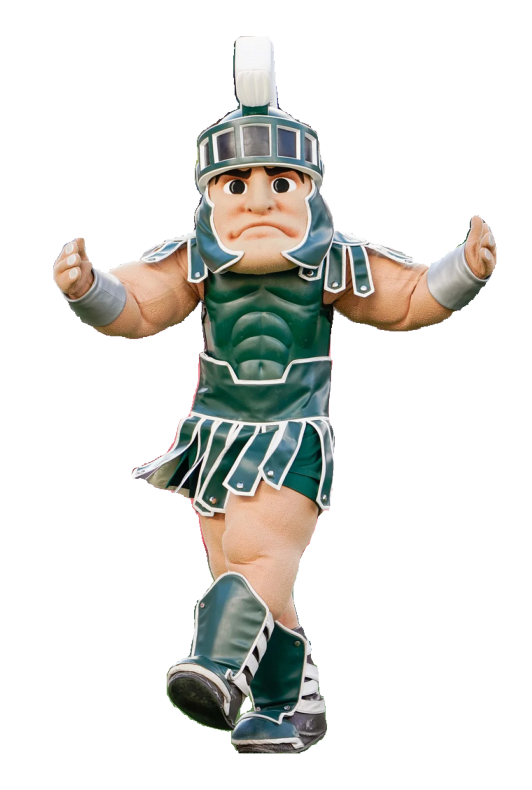

In [4]:
# transform images into NumPy arrays
sparty_array = np.asarray(sparty)
mask_array = np.asarray(mask)

# stack the mask layer on top of the RGB layers
new_sparty = np.stack([sparty_array[:,:,0],sparty_array[:,:,1],sparty_array[:,:,2],mask_array], axis=2)

# plot
plt.figure(figsize = (10,10))
plt.imshow(new_sparty)
plt.axis('off')

Cool! We isolated Sparty from the background. However, the outline looks a bit rough. Let's smooth the mask with a blur. First, we need some functions to help us. Run the cell below.

In [5]:
def onBoard(i,j,image):
    if i <= image.shape[0]-1 and i >= 0 and j <= image.shape[1]-1 and j >= 0:
        return True
    else:
        return False

def getNeighborValues(i,j, board):
    neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if onBoard(neighbor[0], neighbor[1], board):
            neighbor_values.append(board[neighbor[0], neighbor[1]])
    
    return neighbor_values

def zeros_array(array):
    return np.zeros((len(array[:,0]), len(array[0,:])))

def nearby_averages(i, j, array):
    vals = getNeighborValues(i, j, array)
    vals.append(array[i,j])
    vals_array = np.asarray(vals)
    avg = np.mean(vals_array)
    return avg

Check out the code for the blurring filter below. The outer for-loop allows for multiple iterations of "blurring," which you can change using the `iterations` variable. For now, leave it at 1.

The way the blurring works is, the RGB values of a "blurred" pixel should be equal to the average RGB values of the "unblurred" pixel and its neighbors from the original image. See the visual below for a demonstration of this process.

### Question 1.4 (10 points)

At each line with a single hashtag `#`, add a comment explaining what the below line(s) of code are doing. This code may take a couple of minutes to run.

(-0.5, 732.5, 1101.5, -0.5)

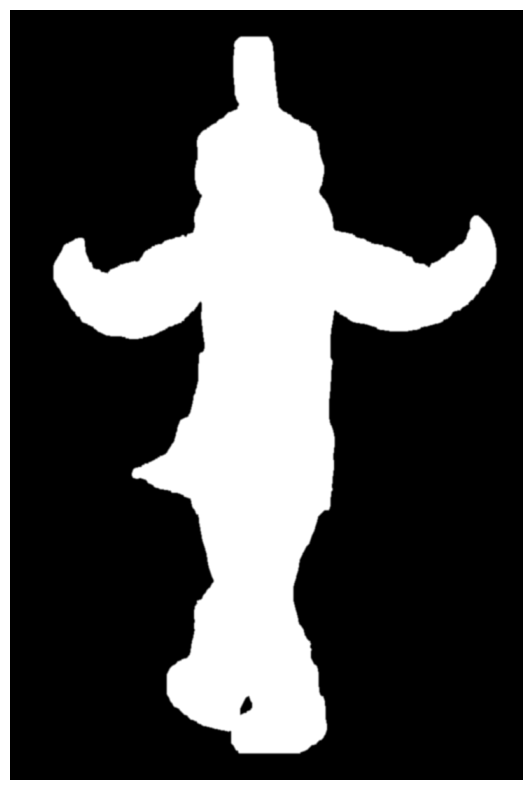

In [7]:
current_pic = mask_array
iterations = 2

# 1. loop iterates through the three dimensions (0, 1, 2)
for x in range(iterations):
    # 2. creates an object that converts the image into a NumPy array
    current_array = np.asarray(current_pic)
    
    # 3. generates a new array of the same shape as the input array but with all zeros as its content.
    blurred_array = zeros_array(current_array)

    # 4. loop iterates the same number of times as the number of rows of the first column
    for i in range(len(current_array[:,0])):
        # 5. nested loop iterates the same number of times as the number of columns in the first row
        for j in range(len(current_array[0,:])):
            # 6. returns the average of the values in the neighborhood of the cell in the array
            avg = nearby_averages(i, j, current_array)
            
            # 7. transfers the average values to the array holding the blurred image
            blurred_array[i, j] = avg
    
    # 8. updates the picture with the blurred image in 8-bit integer format
    current_pic = blurred_array.astype(np.uint8)

# 9. creates a plot of the array values to generate the image, and deletes the axes
plt.figure(figsize = (10,10))
plt.imshow(current_pic, cmap='binary_r') # 10. What does the cmap argument do? You may need to look at the matplotlib documentation
# specifies the colormap that will be used to map scalar data to colors in the image.
plt.axis('off')

### Question 1.5 (2 points)
What does the code below do? Feel free to use any online resources to read more about `np.stack`.

In [8]:
new_sparty_smooth = np.stack([sparty_array[:,:,0],sparty_array[:,:,1],sparty_array[:,:,2],current_pic], axis=2)

<font size=6 color="#009600">&#9998;</font> *It stacks a bunch of arrays one after the other in sequence on the provided axis. In the context of this array, the three different color schemes of sparty were stacked onto each other in the third axis.*

(-0.5, 732.5, 1101.5, -0.5)

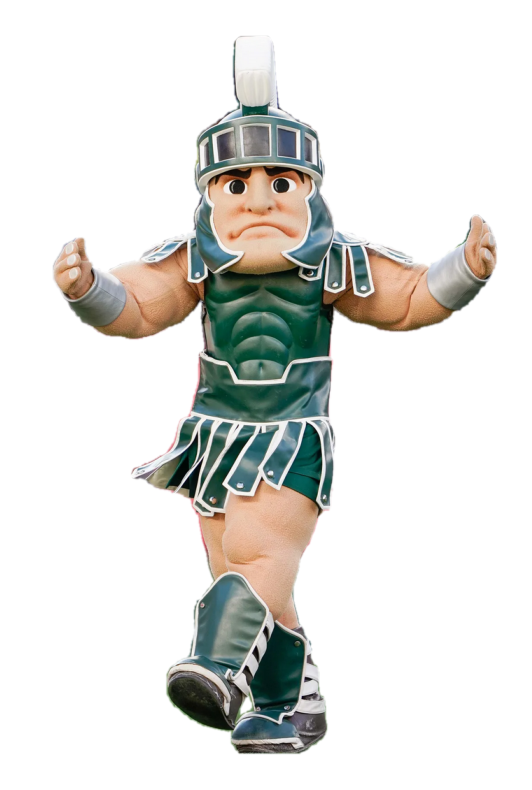

In [9]:
# plot the smoothed sparty pic
plt.figure(figsize = (10,10))
plt.imshow(new_sparty_smooth)
plt.axis('off')

We need a cool background for Sparty. Let's use the picture from the in-class assignment.

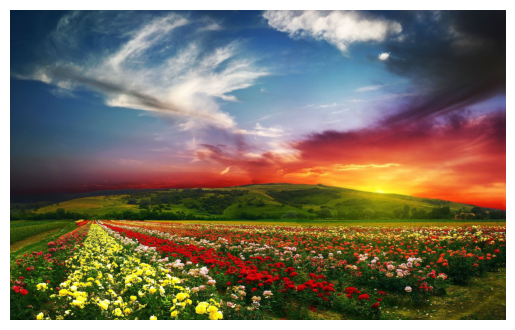

In [16]:
picture_array = plt.imread("landscape.jpeg")
plt.imshow(picture_array)
_ = plt.axis('off')

### Question 1.6 (5 points)

Let's put Sparty in the top left part of the photo. The code to do this below is from ChatGPT but some of the comments are missing! Write in the comments after each number.

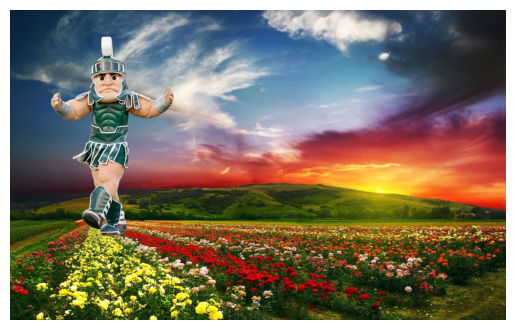

In [23]:
# Make a copy because the orignal picture cannot be changed.
composite = picture_array.copy()

# Choose a position to put Sparty
position = (100, 150)

# 1. Reduce the size of Sparty
small_height, small_width = new_sparty_smooth.shape[:2]

# Calculate the region of interest (ROI) for overlaying the smaller image onto the larger image
roi_height = min(small_height, composite.shape[0] - position[0])
roi_width = min(small_width, composite.shape[1] - position[1])
roi = np.copy(composite[position[0]:position[0] + roi_height, position[1]:position[1] + roi_width])

alpha = new_sparty_smooth[:, :, 3] / 255.0  # 2. introduces transparency value alpha to accomodate the blending process
inv_alpha = 1.0 - alpha # 3.inverse transparency, where higher value signifies lower transparency

# Blend the images, ignoring pixels with zero alpha values in the smaller image
for c in range(3):  # Blend RGB channels separately
    roi[:, :, c] = alpha[:roi_height, :roi_width] * new_sparty_smooth[:roi_height, :roi_width, c] + inv_alpha[:roi_height, :roi_width] * roi[:, :, c]

# Update the larger image with the blended region
composite[position[0]:position[0] + roi_height, position[1]:position[1] + roi_width] = roi

# 4. display image by plotting the composite image
plt.imshow(composite)
plt.axis('off'); #5. What does the ';' do? Ans: generally used to separate two statements on the same line. upon research, i discovered that in jupyter, the semicolon suppreses the line of code it is used in

This looks great! We got the background image from the CMSE 201 website, so we don't need to cite it. However, we forgot to cite the Sparty image! This is the [URL](https://www.lansingstatejournal.com/picture-gallery/sports/college/msu/football/2018/12/31/michigan-state-oregon-football-redbox-bowl/2452481002/) where the image is from. 

### Question 1.7 (2 points)
Using a common citation formatting style (e.g. APA, MLA, or Chicago), properly cite the Sparty image.

<font size=6 color="#009600">&#9998;</font> 

Szeto, Stan. *Michigan State Spartans mascot performs during the third quarter against the Oregon Ducks at Levi's Stadium.* Photograph. Lansing State Journal, 31 Dec 2018. https://www.lansingstatejournal.com/picture-gallery/sports/college/msu/football/2018/12/31/michigan-state-oregon-football-redbox-bowl/2452481002/, Accessed 4 Apr 2024.

---
<a id="part_2"></a>

## Part 2: Only you!..... can prevent forest fires (43 points)
[Back to Top](#toc)

Agent-based modeling (ABM) is a powerful simulation technique that models the dynamics of complex systems through the interactions of individual agents and their environment. In the context of forest fires, agents can represent various entities such as trees, fire, firefighters, or environmental conditions. By simulating the interactions among these agents and the rules governing their behavior, we can gain insights into the spread of forest fires and the effectiveness of different prevention and control strategies.

This approach allows for the exploration of scenarios that would be impossible, dangerous, or unethical to study in real life, making it an invaluable tool for research and decision-making in wildfire management. Through ABM, we can investigate how changes in the environment or in the behavior of individual agents affect the overall dynamics of the system, providing critical insights into how forest fires start, spread, and can potentially be contained.

In this part of the homework, you will engage with an agent-based model to simulate and analyze forest fires. This exercise aims to deepen your understanding of ABM as a tool for studying complex ecological phenomena and to explore strategies for fire prevention and control. Specifically, you will:

- **Understand the Basics of Agent-Based Modeling:** Grasp the foundational concepts of ABM and how it can be applied to simulate complex systems such as forest fires.
- **Implement a Simple Forest Fire Model:** Use programming skills to create a basic simulation of a forest fire, incorporating various agents and simulating their interactions.
- **Analyze Simulation Results:** Learn to interpret the outcomes of your simulations, understanding how different variables and conditions affect the spread of fire.
- **Explore Prevention Strategies:** Investigate the effectiveness of various fire prevention and control strategies through simulation, considering the role of environmental factors and human intervention.
- **Connect Models to Real-World Systems:** Reflect on how the models relate to real-world systems and how they can inform policy-making and forest management practices.

By completing this part, you will not only gain a better understanding of the mechanics and applications of agent-based modeling but also contribute to the broader conversation on how to effectively manage and prevent forest fires.

In [24]:
## Import packages
# standard includes
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Next we are going to import some specific libraries we will use to get the animation to work cleanly
from IPython.display import display, clear_output
import time  

### Functions for the model

In this part, we will begin with the code from Forest Fire Day 2 (Day 22 In Class) to learn a bit more about forest fires. The cells below hold that functioning code and one run of the model.

We are going to explore the idea of controlled (or prescribed) burns for forest management. Read [this (short) article](https://www.vox.com/science-and-health/2022/6/15/23169428/wildfire-season-controlled-burn-climate) about the origin of prescribed burns and how they are used. Then, begin to work through the coding questions below.

You don't need to do anything here except run this cell.

In [25]:
#############RUN THIS CELL ###################
def plotgrid(myarray,markersize=10,title=None):
    
    # First create two vectors based on the x and y sizes of the grid
    x_range = np.linspace(0, myarray.shape[1]-1, myarray.shape[1]) 
    y_range = np.linspace(0, myarray.shape[0]-1, myarray.shape[0])
    
    # Use the numpy meshgrid function to create two matrices
    # of the same size as myarray with x and y indexes
    x_indices, y_indices = np.meshgrid(x_range, y_range)
    
    # Make a list of all the x and y indexes that are either trees or fire.
    tree_x = x_indices[myarray == 1];   
    tree_y = y_indices[myarray == 1]; 
    fire_x = x_indices[myarray == 2];   
    fire_y = y_indices[myarray == 2]; 
    
    # Plot the trees and fire.
    plt.plot(tree_x, myarray.shape[0] - tree_y - 1, 'gs',markersize=markersize)   
    plt.plot(fire_x, myarray.shape[0] - fire_y - 1, 'rs',markersize=markersize)  
    
    # Set the x and y limits so we don't cut off the shapes
    plt.xlim([-1,myarray.shape[1]])
    plt.ylim([-1,myarray.shape[0]]) 

    # Removing tick marks
    plt.tick_params(axis='both', which='both',
                    bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labelleft=False)
    
    # Set the plot title
    if title is not None:
        plt.title(title)

def set_trees(board_size=50,f_trees_start=0.5):
    '''
    Creates the initial game board and adds trees.

    Inputs:
        board_size: length of one edge of the board
        f_trees_start: probability that a given cell is a tree
                       (effectively the tree density)

    Outputs a 2D numpy array with values set to either 0, 1, or 2
        (empty, tree, or fire)
    '''
    
    # all cells initialized to 'empty' (0) by default
    game_board = np.zeros((board_size,board_size),dtype='int64')
    
    # loop over board and roll the dice; if the random number is less
    # than f_trees_start, make it a tree.
    for i in range(board_size):
        for j in range(board_size):
            if np.random.random() <= f_trees_start:
                game_board[i,j] = 1
   
    return game_board

def start_fire(game_board,mode='line'):
    '''
    Starts a fire on the game board.
    
    Input: a game board
    
    Output: a game board with fire
    '''
    
    if mode == 'line':
        game_board[:,0] = 2
    
    return game_board

def onBoard(i,j,image):
    if i <= image.shape[0]-1 and i >= 0 and j <= image.shape[1]-1 and j >= 0:
        return True
    else:
        return False

def getNeighborValues(i,j, board):
    neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if onBoard(neighbor[0], neighbor[1], board):
            neighbor_values.append(board[neighbor[0], neighbor[1]])
    
    return neighbor_values

def advance_board(game_board):
    '''
    Advances the game board using the given rules.
    Input: the initial game board.
    Output: the advanced game board
    '''
    
    # create a new array that's just like the original one, but initially 
    # set to all zeros (i.e., totally empty)
    new_board = np.zeros_like(game_board)
    
    # loop over each cell in the board and decide what to do.
    for i in range(game_board.shape[0]):
        for j in range(game_board.shape[1]):
    
            # if the cell was empty last turn, it's still empty.
            # if it was on fire last turn, it's now empty.
            if game_board[i,j] == 0 or game_board[i,j] == 2:
                new_board[i,j] = 0
    
            # now, if it's a tree we have to decide what to do.
            if game_board[i,j] == 1:
                
                # initially make it a tree
                new_board[i,j] = 1
                
                # If one of the neighboring cells was on fire last turn, 
                # this cell is now on fire!
                if 2 in getNeighborValues(i,j,game_board):
                    new_board[i,j] = 2

    # return the new board
    return new_board

def calc_stats(game_board):
    '''
    Calculates the fraction of cells on the game board that are 
    a tree or are empty.
    
    Input: a game board
    
    Output: fraction that's empty, fraction that's covered in trees.
    '''
    
    # use numpy to count up the fraction that are empty
    frac_empty = (game_board == 0).sum() / game_board.size

    # do the same for trees
    frac_tree = (game_board == 1).sum() / game_board.size

    # and fire
    frac_fire = (game_board == 2).sum() / game_board.size
    
    # return it!
    return frac_empty, frac_tree, frac_fire

def has_fire(game_board):
    '''Determines whether there is fire on the board.
    
    Input: a game board
    
    
    Output: True/False
    '''
    
    if game_board.max() > 1:
        return True
    else:
        return False

### Run the Model

You don't need to do anything here except run the cell and make sure everything works.

In [26]:
def forest_fire_model(f_trees_start=0.6,
                      board_size=50,
                      fire_mode='line',
                     show_vis=True):

    # build the initial board
    game_board = set_trees(board_size=board_size, f_trees_start=f_trees_start)
    game_board = start_fire(game_board,mode=fire_mode)

    # if we are supposed to show the plot, then plot the initial board
    if show_vis:
        fig = plt.figure(figsize=(10,10))
        plotgrid(game_board)

    # define a dictionary to collect our statistics
    stats = {}
    stats['empty'] = []
    stats['tree'] = []
    stats['fire'] = []
    
    # add stats to the dictionary lists
    frac_empty, frac_tree, frac_fire = calc_stats(game_board)
    stats['empty'].append(frac_empty)
    stats['tree'].append(frac_tree)
    stats['fire'].append(frac_fire)
    
    # while there is still fire
    while has_fire(game_board):

        # advance the game board
        game_board = advance_board(game_board)
    
        if show_vis:
            # show the game board
            plotgrid(game_board)
            time.sleep(0.01)  # 
            clear_output(wait=True)
            display(fig)
            fig.clear()
        
        # add stats to the dictionary lists
        frac_empty, frac_tree, frac_fire = calc_stats(game_board)
        stats['empty'].append(frac_empty)
        stats['tree'].append(frac_tree)
        stats['fire'].append(frac_fire)

    if show_vis:
        # close the plot
        plt.close()
    
    return stats

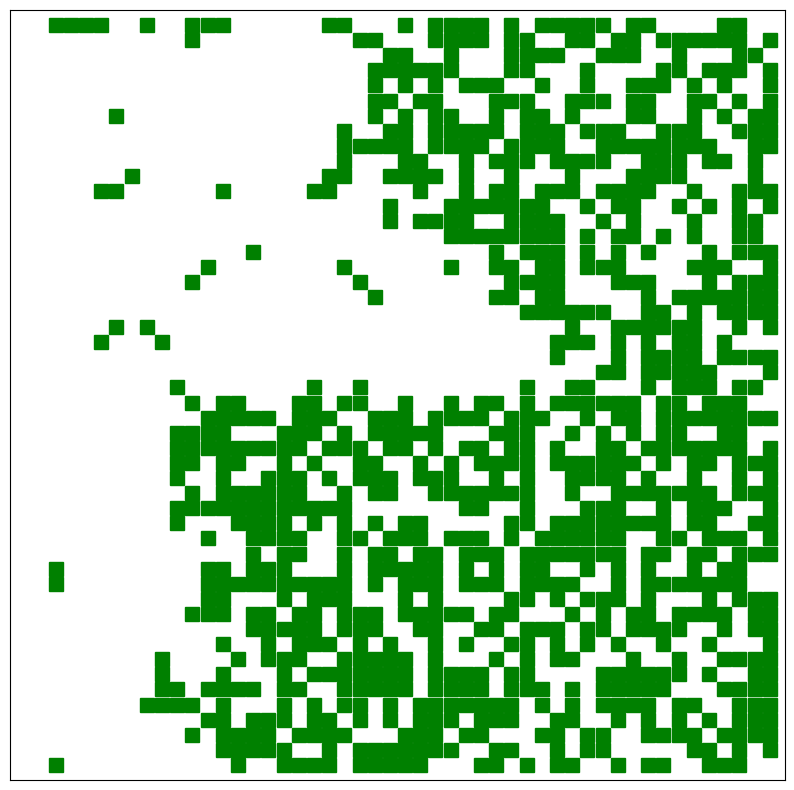

In [27]:
stats = forest_fire_model()

Since we saved the statistics, we can make a nice graph:

Text(0, 0.5, 'Count')

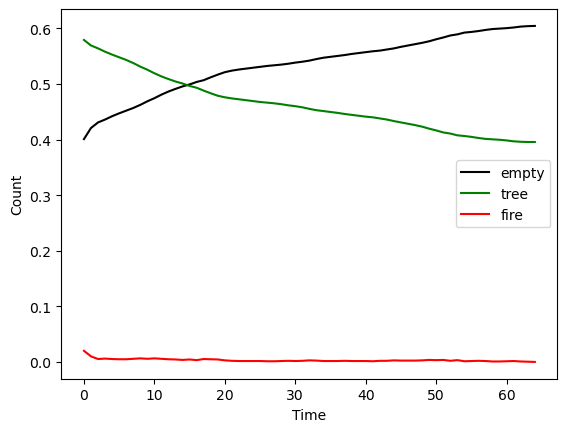

In [28]:
plt.plot(stats['empty'],color='black',label='empty')
plt.plot(stats['tree'],color='green',label='tree')
plt.plot(stats['fire'],color='red',label='fire')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Count')

### **Question 1 (10 points):** 

Run this code three times, saving the stats each time, and plot the results.

Use a `subplot` command so you can view them all side-by-side.  

**Tip:** to make it faster, call the `forest_fire_model` function with `show_vis=False`

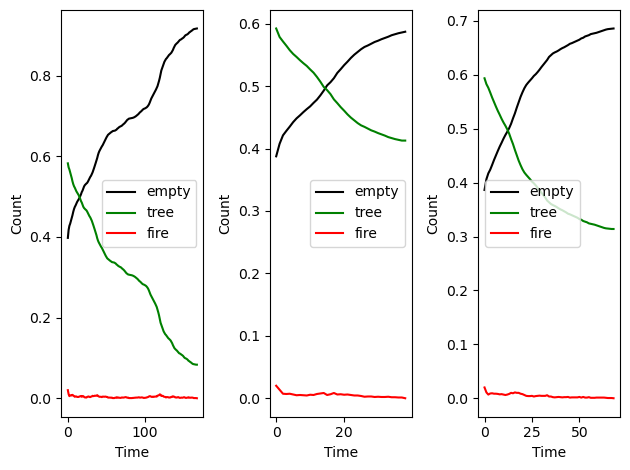

In [34]:
plt.subplot(131)
stats = forest_fire_model(show_vis=False)
plt.plot(stats['empty'],color='black',label='empty')
plt.plot(stats['tree'],color='green',label='tree')
plt.plot(stats['fire'],color='red',label='fire')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Count')

plt.subplot(132)
stats = forest_fire_model(show_vis=False)
plt.plot(stats['empty'],color='black',label='empty')
plt.plot(stats['tree'],color='green',label='tree')
plt.plot(stats['fire'],color='red',label='fire')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Count')

plt.subplot(133)
stats = forest_fire_model(show_vis=False)
plt.plot(stats['empty'],color='black',label='empty')
plt.plot(stats['tree'],color='green',label='tree')
plt.plot(stats['fire'],color='red',label='fire')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Count')

plt.tight_layout()

**Q) What do you observe?  (3 points)**

<font size=6 color="#009600">&#9998;</font> *There is a general pattern. Slowly dwindling flames, decreasing numbder of trees, and an increasing number of empty cells, albeit at different levels, except for the fire, which remained nearly the same for all three. Also, the number of empty cells are closely the same.*

### **Question 2 (5 points):** 

Add a new mode to the `start_fire` function 

Below, is a copy of the `start_fire` function. You need to edit the code so that if it is called with `mode='point'` **then the board only sets one random cell on fire instead of the whole first line.** 

Keep `'line'` as the default value for `mode`. To get a random position in x and y, use `np.random.randint()` (instead of `np.random.random()`). Demonstrate that your code works by running the following cell.

In [52]:
def start_fire(game_board,mode='line'):
    '''
    Starts a fire on the game board.
    
    Input: a game board
    
    Output: a game board with fire
    '''
    
    if mode == 'line':
        game_board[:,0] = 2
    elif mode == "point":
        game_board[np.random.randint(0,game_board.shape[0]), np.random.randint(0,game_board.shape[1])] = 2
    
    return game_board

Success!


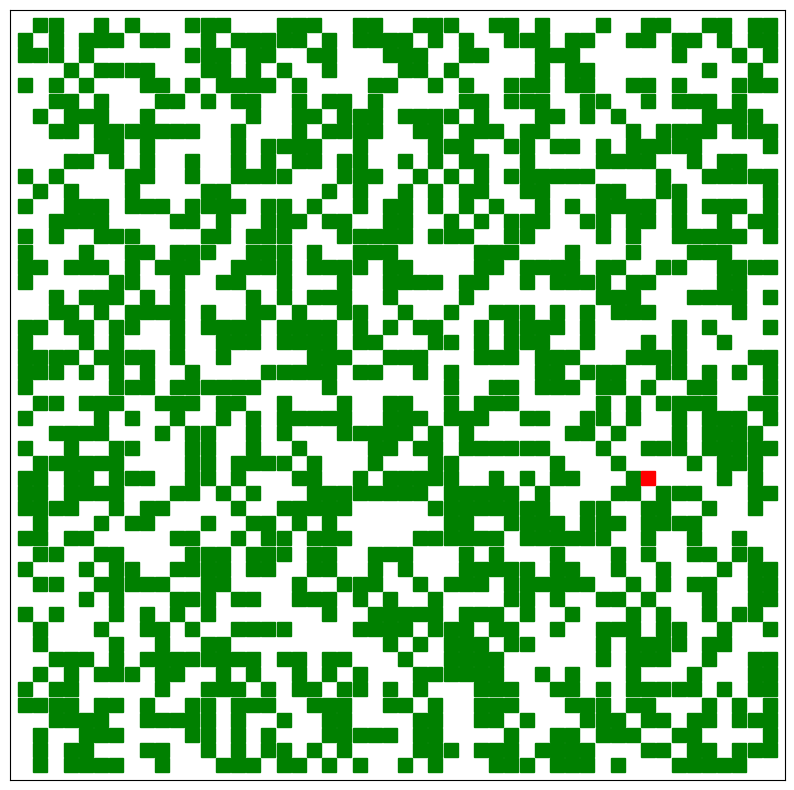

In [53]:
# testing start_fire with mode='point'

game_board = set_trees()
game_board = start_fire(game_board,mode='point')
fig = plt.figure(figsize=(10,10))
plotgrid(game_board)

if (game_board==2).sum()==1:
    print("Success!")
else:
    print("Not working yet!")

### Question 3 (5 points): 

Testing a `regrowth` function

In the cell below, there is a function defined as `regrowth` that adds new trees by applying what amounts to a chance (or probability) that a tree "grows" there. 

In [54]:
def regrow(game_board,growth_rate=0.01):
    new_board = np.copy(game_board)
    for i in range(new_board.shape[0]):
        for j in range(new_board.shape[1]):
            # if the cell on the board is empty, there's a chance a new tree will spawn
            if new_board[i,j] == 0:
                if np.random.random() <= growth_rate: # if the random number exceeds growth_rate, grow a tree
                    new_board[i,j] = 1
                else:
                    new_board[i,j] = 0

    return new_board

**Next,** demonstrate that this function works by initializing a board with `set_trees` with an initial tree fraction of 0.1, and then run it through three rounds of `regrow` with `growth_rate=0.5`.  

Plot the original map **and** the map after each stage of regrowth in the same set of subplots.

**Hint: Make a list of grids and then pass it to the `plotgrids` function, defined below.**

In [55]:
def plotgrids(grid_list,n_rows=1):
    # determine the right number of columns using the number of grids
    n_cols = int(np.ceil(len(grid_list)/n_rows))
    
    # defining a figure with the right size
    plt.figure(figsize=(5*n_cols,5*n_rows))
    
    # looping through the grids
    for i,grid in enumerate(grid_list):
        # set the right plot for this grid
        plt.subplot(n_rows,n_cols,i+1)
        
        # call the plotgrid function
        plotgrid(grid,markersize=5)

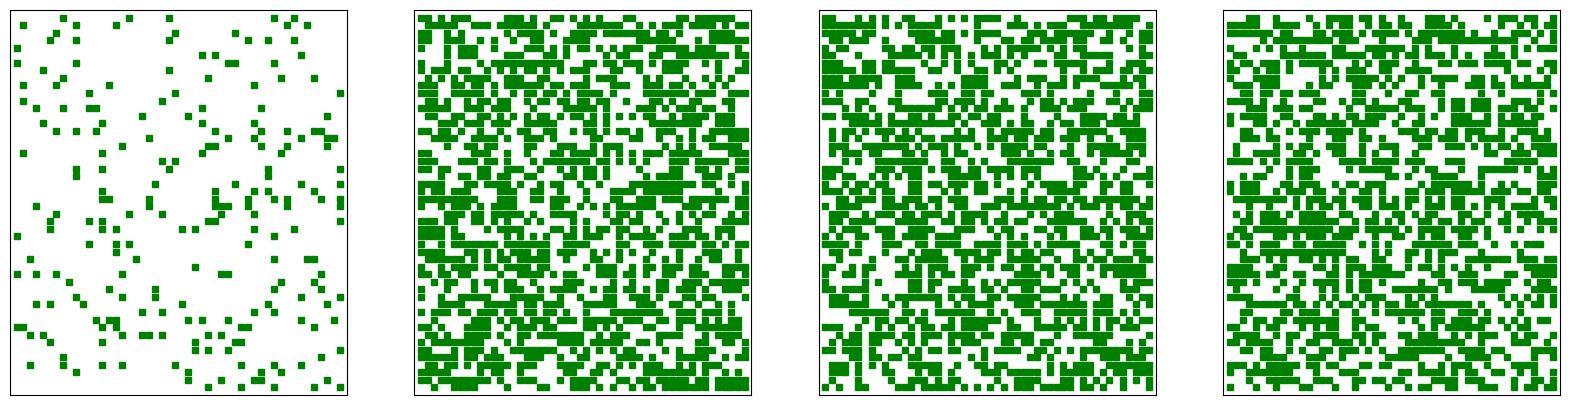

In [57]:
new_board = set_trees(board_size=50,f_trees_start=0.1)
grids=[new_board]

for i in range(3):
    grids.append(regrow(new_board, 0.5))

plotgrids(grids)

### Question 4 (5 points):

Model point fires and growth together!

The following cell puts it all together.  It will model some number of years of the forest's dynamics, where trees grow, but a fire can start with a probability given by `fire_init_prob`. 

In [60]:
def forest_fire_growth_model(
    n_years,
    fire_init_prob,
    growth_rate,
    f_trees_start,
    board_size=50,
    show_vis=True):

    year = 0
    
    # build the initial board
    game_board = set_trees(board_size=board_size, f_trees_start=f_trees_start)

    # if we are supposed to show the plot, then plot the initial board
    if show_vis:
        fig = plt.figure(figsize=(10,10))
        #plotgrid(game_board,title=f'Year {year}')
        plotgrid(game_board)
        time.sleep(0.01)  # 
        clear_output(wait=True)
        display(fig)
        fig.clear()

    # define a dictionary to collect our statistics
    stats = {}
    stats['empty'] = []
    stats['tree'] = []
    stats['fire'] = []
    
    # add stats to the dictionary lists
    frac_empty, frac_tree, frac_fire = calc_stats(game_board)
    stats['empty'].append(frac_empty)
    stats['tree'].append(frac_tree)
    stats['fire'].append(frac_fire)
    
    # loop over the years
    for year in range(1,n_years):
        
        # regrow
        game_board = regrow(game_board,growth_rate=growth_rate)
        
        if show_vis:
            plotgrid(game_board,title=f'Year {year}')
            time.sleep(0.01)  # 
            clear_output(wait=True)
            display(fig)
            fig.clear()

        # record number of trees to measure the fire size
        num_trees_before = (game_board==1).sum()
            
        # start fire?
        if np.random.random() < fire_init_prob:
            game_board = start_fire(game_board,mode='point')
                
        # progress the fire until it is fully burned out 
        while has_fire(game_board):
            
            # advance the game board
            game_board = advance_board(game_board)
              
            if show_vis:
                # show the game board
                plotgrid(game_board,title=f'Year {year} (Fire!)')
                time.sleep(0.01)  # 
                clear_output(wait=True)
                display(fig)
                fig.clear()
                
        # record number of trees to measure the fire size
        num_trees_after = (game_board==1).sum()
        
        # add stats to the dictionary lists
        frac_empty, frac_tree, frac_fire = calc_stats(game_board)
        stats['empty'].append(frac_empty)
        stats['tree'].append(frac_tree)
        
        # now tracking the total number of trees removed by the fire
        stats['fire'].append(num_trees_before - num_trees_after)

    if show_vis:
        # close the plot
        plt.close()
    
    return stats

Run the cell below (first with `show_vis=True`, but later with `show_vis=False` to speed things up), to see 150 years of forest action!

In [69]:
stats = forest_fire_growth_model(f_trees_start=0.30,
                                 n_years=150,
                                 fire_init_prob=0.1,
                                 growth_rate=0.005,
                                 show_vis=False)

Use the cell below to plot the statistics from that run, which now track the maximum fire size for a given year in the `stats['fire']` list.

Text(0, 0.5, 'Maximum fire size')

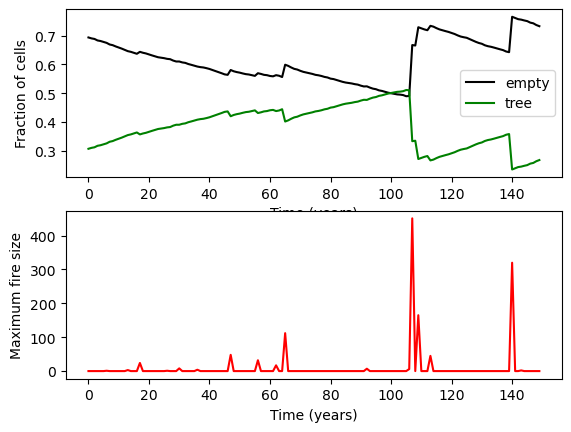

In [70]:
plt.subplot(2,1,1)
plt.plot(stats['empty'],color='black',label='empty')
plt.plot(stats['tree'],color='green',label='tree')
plt.xlabel('Time (years)')
plt.ylabel('Fraction of cells')
plt.legend()

plt.subplot(2,1,2)
plt.plot(stats['fire'],color='red',label='fire')
plt.xlabel('Time (years)')
plt.ylabel('Maximum fire size')

**What do you observe? Run the model two or three times to get a sense of the possible outcomes. (5 points)**

<font size=6 color="#009600">&#9998;</font> *The empty and tree relationship are nearly inverse to each other, while the fires peak every few years, and there is a drastic change during every peak, which is resonated by the fraction of tree and empty cells.*

### Question 5 (10 points): Increasing the fire frequency

Now we want to study how the size of the fires depends on the fire frequency. 

Let's examine four different values of `fire_init_prob`:  [0.01, 0.05, 0.1, 0.2].  Keep the other parameters as follows:

```
f_trees_start=0.30
n_years=150
growth_rate=0.005
```

For each value, run 10 different simulations, and determine the **size of the largest fire** in the 150-year span, which we will call `f_largest`.

Then, report the **average of `f_largest`** for each value of `fire_init_prob`, along with a standard error of the mean.

Remember, the standard error for a list can be calculated as follows:

In [71]:
def std_err(x_list):
    return np.std(x_list)/np.sqrt(len(x_list))

**Tip:  for this section, it will definitely help to run with `show_vis=False`!**

In [89]:
fire_init_prob = [0.01, 0.05, 0.1, 0.2]
f_largest = []
st_errors = []

for rate in fire_init_prob:
    f = []
    for i in range(10):
        stats = forest_fire_growth_model(f_trees_start=0.30,
                                 n_years=150,
                                 fire_init_prob=rate,
                                 growth_rate=0.005,
                                 show_vis=False)
        f.append(stats['fire'])
    f_largest.append(np.mean(max(f)))
    st_errors.append(std_err((max(f))))

In [95]:
fire_init_prob = [0.01, 0.05, 0.1, 0.2]
f_largest = []
st_errors = []

for rate in fire_init_prob:
    f = []
    for i in range(10):
        stats = forest_fire_growth_model(f_trees_start=0.30,
                                          n_years=150,
                                          fire_init_prob=rate,
                                          growth_rate=0.005,
                                          show_vis=False)
        f.append(stats['fire'])
    f_largest.append(np.mean(f))
    st_errors.append(std_err(f))

for i, rate in enumerate(fire_init_prob):
    print(f"For fire_init_prob={rate}:")
    print(f"Average largest fire size: {f_largest[i]}")
    print(f"Standard error of the mean: {st_errors[i]}")
    print()

For fire_init_prob=0.01:
Average largest fire size: 2.2506666666666666
Standard error of the mean: 16.806307842262346

For fire_init_prob=0.05:
Average largest fire size: 4.679333333333333
Standard error of the mean: 19.758520118897795

For fire_init_prob=0.1:
Average largest fire size: 6.1386666666666665
Standard error of the mean: 16.32043944942115

For fire_init_prob=0.2:
Average largest fire size: 6.55
Standard error of the mean: 10.336870093666327



**What do you observe? How does the average size of the largest fire depend on the fire initialization probability parameter? (3 points)**

<font size=6 color="#009600">&#9998;</font> *The magintude of the largest fire was increasing, while the error was decreasing with increasing initialization parameter.*

### Question 6 (8 points): Proposing solutions

A reasonable goal would be to **minimize the chance of large fires occurring**, which can result in catastrophic damage and loss of life.

Keeping in mind [the article on prescribed burns for forest management](https://www.vox.com/science-and-health/2022/6/15/23169428/wildfire-season-controlled-burn-climate), as well as what you learned from the model above, think about how intentionally starting fires in certain places and times could affect the dynamics of the forest.

**Below, propose a policy for prescribed burns that could help minimize the size of the largest fires. (5 points)**

<font size=6 color="#009600">&#9998;</font> *Conduct prescribed burns during periods of low fire risk, such as during cooler and moister seasons. Avoid conducting burns during periods of high wind or extreme dryness, which could lead to uncontrollable fires.*

**When considering a realistic policy, what are some important factors to consider that are not included in this simple model of forest fires? (Give at least three examples) (3 points)**

<font size=6 color="#009600">&#9998;</font> *Weather conditions that can increase the potency of the fire, global warming making forest fires more likely to happen, and different types of trees and soil.*

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

It should be uploaded into the "Homework Assignments" dropbox folder for Homework #5.  Submission instructions can be found at the end of the notebook.